# Finding Heavy Traffic Indicators on I-94

#### Indicators that contribute to heavy traffic on I-94

This project is an analysis of the westbound traffic on the I-94 Interstate Highway. The goal of this analysis is trying to find out a few indicators of westbound heavy traffic on the I-94.


## Reading in the dataset

In [62]:
import pandas as pd

data_set = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
print(data_set.head())

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  


In [61]:
print(data_set.tail())

      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0          90  Thunderstorm   
48202    None  282.09      0.0      0.0          90        Clouds   
48203    None  282.12      0.0      0.0          90        Clouds   

          weather_description           date_time  traffic_volume  month  \
48199           broken clouds 2018-09-30 19:00:00            3543      9   
48200         overcast clouds 2018-09-30 20:00:00            2781      9   
48201  proximity thunderstorm 2018-09-30 21:00:00            2159      9   
48202         overcast clouds 2018-09-30 22:00:00            1450      9   
48203         overcast clouds 2018-09-30 23:00:00             954      9   

       dayofweek  hour  
48199          6    19  
48200          6    20  
48201          6    21  
48202          6    22  
482

In [60]:
print(data_set.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              48204 non-null  object        
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_main         48204 non-null  object        
 6   weather_description  48204 non-null  object        
 7   date_time            48204 non-null  datetime64[ns]
 8   traffic_volume       48204 non-null  int64         
 9   month                48204 non-null  int64         
 10  dayofweek            48204 non-null  int64         
 11  hour                 48204 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(5), object(3)
memory usage: 4.4+ MB
None


## Analyzing Traffic Volume

The [dataset](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume) documentation mentions that a station located approximately midway between Minneapolis and Saint Paul recorded the traffic data. Also, the station only records westbound traffic (cars moving from east to west).

This means that the results of our analysis will be about the westbound traffic in the proximity of that station. In other words, we should avoid generalizing our results for the entire I-94 highway.

### Plotting a Histogram
Now we're going to plot a histogram to visualize the distribution of the traffic_volume column. 

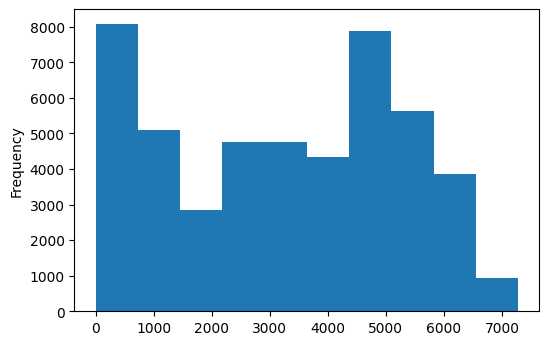

In [59]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

data_set['traffic_volume'].plot.hist()
plt.show()

In [58]:
data_set['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

#### Observations

* The hourly volume of traffic ranges from 0 to maximum 7280 cars. On average 3260 cars pass the station.

* In 25% of the time between 0 and 1193 cars pass the station. In 26% - 50% of the time over 1193 and 3380 cars pass the station. And in 75% of the time this amount is 4933 cars. The lowest percentage of cars passing resemble the nighttime traffic volume, and the higher percentage of cars the daytime traffic volume because more people drive during the day on the roads.


## Analyzing Traffic Volume: Day vs. Night

There is a possibility that nighttime and daytime might influence traffic volume. So now we will compare daytime with nighttime data.

We'll start by dividing the dataset into two parts:

* Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
* Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

While this is not a perfect criterion for distinguishing between nighttime and daytime, it's a good starting point.

In [57]:
# Transforming the date_time column to datetime
data_set['date_time'] = pd.to_datetime(data_set['date_time'])

# Creating pandas dataframe objects
daytime_data = pd.DataFrame()
nighttime_data = pd.DataFrame()

# Boolean masks to sort data with series.dt.hour
# to get the hour of every instance of the date_time column
mask1 = data_set['date_time'].dt.hour > 6
mask2 = data_set['date_time'].dt.hour < 20
mask3 = data_set['date_time'].dt.hour < 6
mask4 = data_set['date_time'].dt.hour > 20

# Isolating the daytime data through boolean masks
daytime_data = data_set.loc[(mask1) & (mask2)]

# Isolating the nighttime date through boolean masks
nighttime_data = data_set.loc[(mask3) | (mask4)]

 ## Traffic Volume: Day vs. Night (II)

Previously, we divided the dataset into two parts:

   * Daytime data: hours from 7 AM to 7 PM (12 hours)
   * Nighttime data: hours from 7 PM to 7 AM (12 hours)

Now we're going to compare the traffic volume at night and during day.

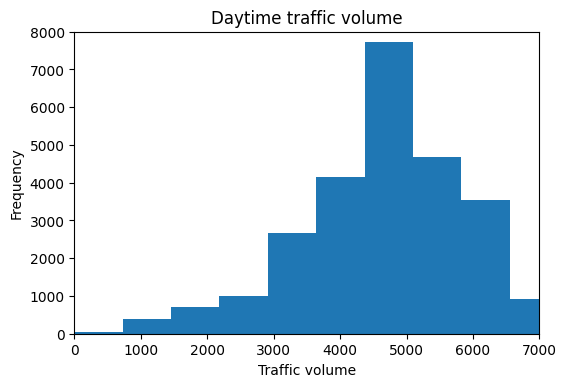

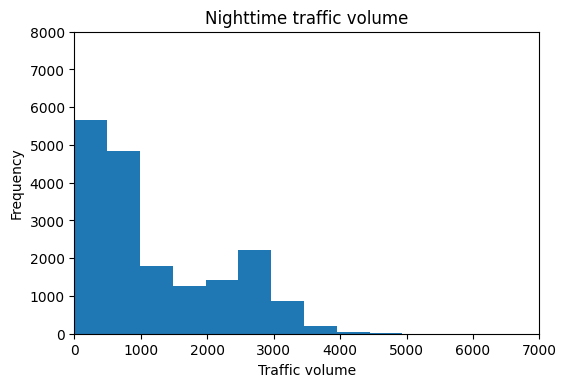

In [56]:
# Plotting histogram of traffic_volume for daytime
daytime_data['traffic_volume'].plot.hist()
plt.title('Daytime traffic volume')
plt.xlabel('Traffic volume')
plt.ylabel('Frequency')
plt.ylim(0,8000)
plt.xlim(0,7000)
plt.show()

# Plotting histogram of traffic_volume for nighttime
nighttime_data['traffic_volume'].plot.hist()
plt.title('Nighttime traffic volume')
plt.xlabel('Traffic volume')
plt.ylabel('Frequency')
plt.ylim(0,8000)
plt.xlim(0,7000)
plt.show()

In [55]:
daytime_data.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,25838.000000,25838.000000,25838.000000,25838.000000,25838.000000
mean,282.347796,0.502320,0.000234,53.040135,4649.292360
std,13.302562,61.167614,0.008511,37.590946,1202.321987
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.720000,0.000000,0.000000,5.000000,4021.000000
50%,283.867000,0.000000,0.000000,75.000000,4736.000000
75%,293.610000,0.000000,0.000000,90.000000,5458.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


In [54]:
nighttime_data.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,18300.000000,18300.000000,18300.000000,18300.000000,18300.000000
mean,279.763924,0.136726,0.000250,44.467158,1243.542623
std,13.076953,1.136206,0.008554,40.277392,973.821602
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,271.510000,0.000000,0.000000,1.000000,412.000000
50%,281.020000,0.000000,0.000000,40.000000,841.500000
75%,290.292500,0.000000,0.000000,90.000000,2044.250000
max,305.150000,55.630000,0.510000,100.000000,4939.000000


### Analysis of results

The daytime histogram shows that the distribution of the traffic volume is left skewed. This means that most of the traffic volume values are high. There are 4,252 or more cars passing the station each hour 75% of the time (because 25% of values are less than 4,252).


The nighttime histogram is right skewed, which means that most of the traffic volume values are low. 75% of the time, the number of cars that passed the station each hour was less than 2,819.

Although there are still measurements of over 5,000 cars per hour, the traffic at night is generally light. Our goal is to find indicators of heavy traffic, so we'll only focus on the daytime data moving forward.

## Time indicators

Previously, we determined that the traffic at night is generally light. Our goal is to find indicators of heavy traffic, so we decided to only focus on the daytime data moving forward.

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of the day.

We're going to look at a few line plots showing how the traffic volume changed according to the following parameters:

- Month
- Day of the week
- Time of day


In [53]:
# Isolating month data and assigning to new column 'month'
# this values in this column describes the month when the traffic
# volume measurement was taken
data_set['month'] = data_set['date_time'].dt.month

by_month = data_set.groupby('month').mean() # grouping dataset by the month column
                                            # with the mean as an aggregate function
    
by_month['traffic_volume']

month
1     3051.081378
2     3197.945547
3     3308.388611
4     3304.372388
5     3366.319432
6     3419.077413
7     3205.481752
8     3394.241891
9     3303.049334
10    3390.678376
11    3167.592784
12    3024.257943
Name: traffic_volume, dtype: float64

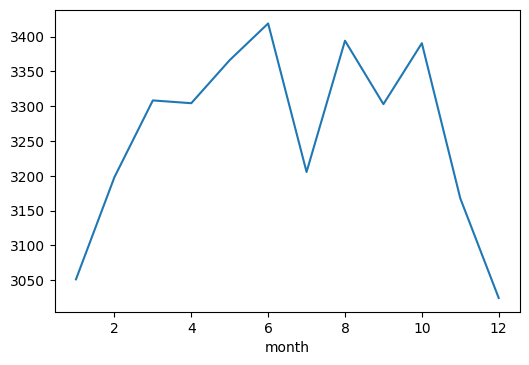

In [52]:
# Generating a line plot to visualize how traffic volume 
# changed each month on average
by_month['traffic_volume'].plot.line()

### Analysis of line plot

In the warmer months starting from April until October the traffic volume peaks, however the exception is for the month July. In this month there is a sudden decline.

## Time Indicators (II)

We generated a line plot showing how the traffic volume changed each month on average.

We'll now continue with building line plots for another time unit: day of the week.

In [51]:
# To get the traffic volume averages for each day of the week
data_set['dayofweek'] = data_set['date_time'].dt.dayofweek
by_dayofweek = data_set.groupby('dayofweek').mean()

by_dayofweek['traffic_volume'] # 0 is Monday, 6 is Sunday

dayofweek
0    3309.387161
1    3488.555799
2    3583.196681
3    3637.899663
4    3656.358836
5    2773.638120
6    2368.588329
Name: traffic_volume, dtype: float64

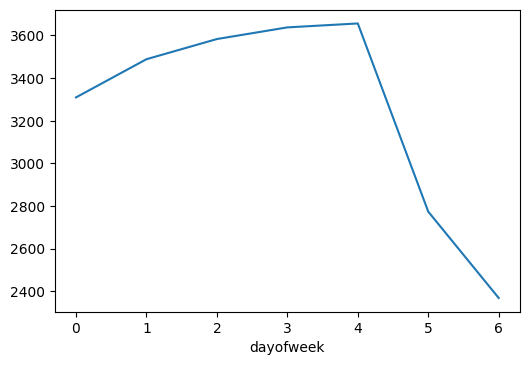

In [50]:
# Generating a line plot to visualize how the traffic volume
# changed each day of the week on average

by_dayofweek['traffic_volume'].plot.line()

### Analysis

During the business days from Monday until Friday the traffic volume is at a constant high volume and during the weekend it declines rapidly.

## Time Indicators (III)

We found that the traffic volume is significantly heavier on business days compared to the weekends.

We'll now generate a line plot for the time of day. The weekends, however, will drag down the average values, so we're going to look at the averages separately. To do that, we'll start by splitting the data based on the day type: business day or weekend.

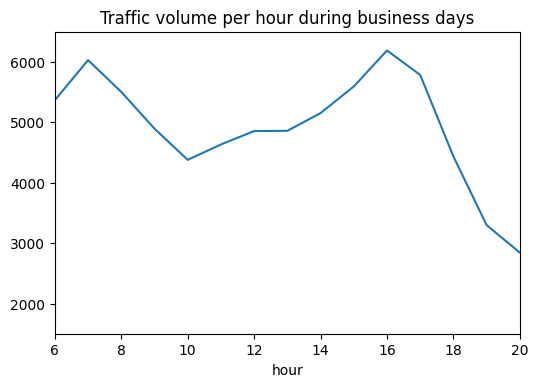

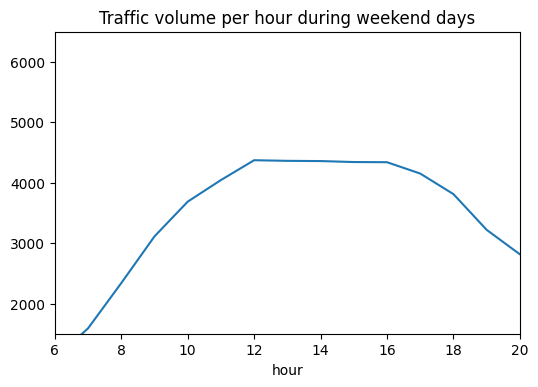

In [49]:
# Isolating data based on bussiness days hours and weekend hours
data_set['hour'] = data_set['date_time'].dt.hour
bussiness_days = data_set.copy()[data_set['dayofweek'] <= 4] # 4 == Friday
weekend = data_set.copy()[data_set['dayofweek'] >= 5] # 5 == Saturday

# Grouping datasets by bussiness days hours and weekend days hours
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

# Generating a line plot to visualize how traffic volume
# changes during business days
by_hour_business['traffic_volume'].plot.line()
plt.title('Traffic volume per hour during business days')
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.show()

# Generating a line plot to visualize how traffic volume
# changes during weekends
by_hour_weekend['traffic_volume'].plot.line()
plt.title('Traffic volume per hour during weekend days')
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.show()

Summary of findings regarding time indicators for heavy traffic:

- The traffic is uaslly heavier during warm months compared to cold months
- During the workweek the traffic is usually heavier than on the weekends
- The rush hours on business days are around 7am and 5pm.

## Weather Indicators

So far, we've focused on finding time indicators for heavy traffic, and we reached the following conclusions:

- The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
- The traffic is usually heavier on business days compared to weekends.
- On business days, the rush hours are around 7 and 16.

Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: temp, rain_1h, snow_1h, clouds_all, weather_main, weather_description.

A few of these columns are numerical so let's start by looking up their correlation values with traffic_volume.

In [47]:
# the temp column shows the biggest correlation with the
# traffic_volume column, although not strong.
data_set.corr()['traffic_volume']

temp              0.130299
rain_1h           0.004714
snow_1h           0.000733
clouds_all        0.067054
traffic_volume    1.000000
month            -0.002533
dayofweek        -0.149544
hour              0.352401
Name: traffic_volume, dtype: float64

(240.0, 320.0)

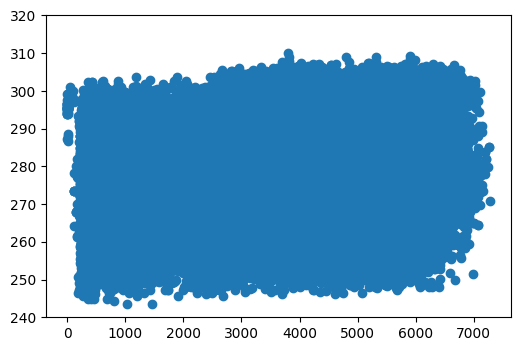

In [46]:
# Finding the weather column with the strongest correlation with
# traffic_volume by plotting a scatter plot
plt.scatter(data_set['traffic_volume'], data_set['temp'])
plt.ylim(240, 320)

As can be seen through the graph, temperature is not a solid indicator for traffic. The other numerical columns (rain_1h, snow_1h, and clouds_all) also didn't show a strong correlation with the traffic_volume column.

## Weather Types

To see if we can find more useful data, we'll look next at the categorical weather-related columns: weather_main and weather_description.

We're going to calculate the average traffic volume associated with each unique value in these two columns. 

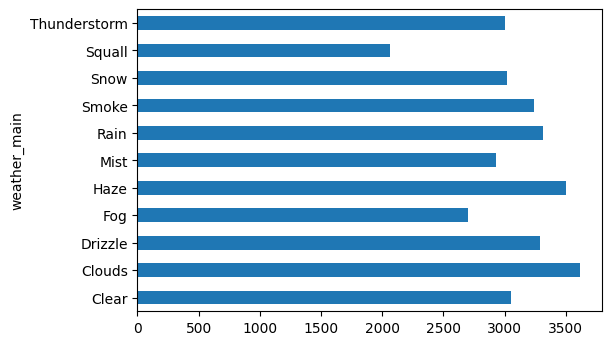

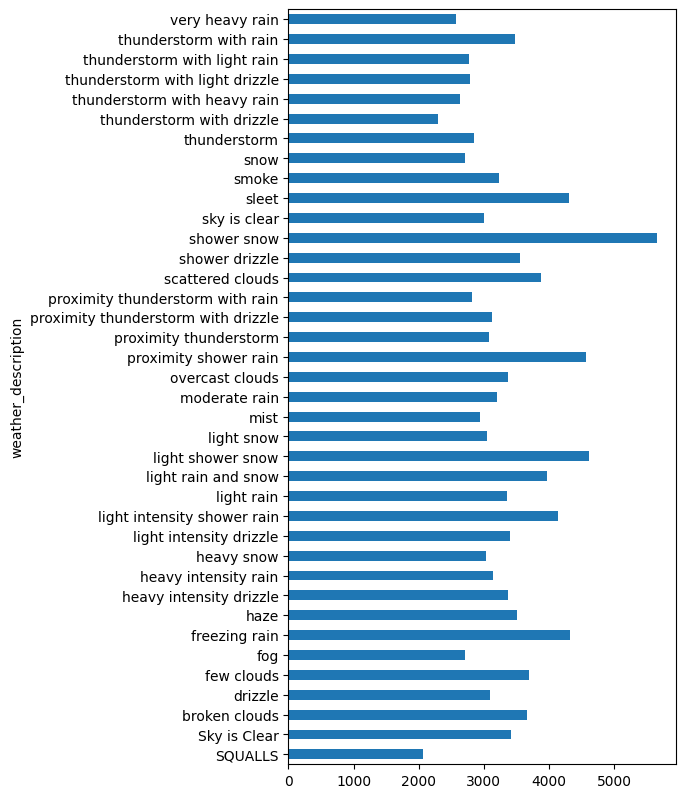

In [45]:
# Grouping the dataset by column weather_main
by_weather_main = data_set.groupby('weather_main').mean()

# Plotting a horizontal bar for the traffic_volume column of by_weather_main
by_weather_main['traffic_volume'].plot.barh()
plt.show()

# Grouping the dataset by column weather weather_description
by_weather_description = data_set.groupby('weather_description').mean()

# Plotting a horizontal bar for the traffic_volume column of by_weather_description
by_weather_description['traffic_volume'].plot.barh(figsize=(5,10))
plt.show()

### Analysis
- In the first graph there is no weather type which causes the traffic volume to exceed 5000 cars.
- In the second bar plot the indicator, shower snow, causes heavy traffic.

## Conclusion
In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators:

**Time indicators**
- The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
- The traffic is usually heavier on business days compared to the weekends.
- On business days, the rush hours are around 7 and 16.
    
**Weather indicators**
- Shower snow